<a href="https://colab.research.google.com/github/jungmin0710/K-digital-PythonDeepLearning/blob/main/CNN_Wafer_ResNet_Fine_Tuning_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = 'red'>Deep Learning - TEST</font>
<br>

# 이름 :  엄정민

# 사전 학습된 CNN(ResNet)을 이용한 "Wafer Image" Fine Tunig
## ResNet Model
* ILSVRC-2015 우승
* Residual Network(Skip Connection)
* 152 Layers

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Import Keras

* Keras Version 확인

In [3]:
import keras

keras.__version__

'2.4.3'

# I. Google Drive Mount
* 'dogs_and_cats_small.zip' 디렉토리를 구글드라이브에 업로드

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


> ## 1) 구글 드라이브 마운트 결과 확인

In [5]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/waferImages.zip'

-rw------- 1 root root 1141460846 Mar  4 04:50 '/content/drive/My Drive/Colab Notebooks/datasets/waferImages.zip'


> ## 2) unzip 'waferImages.zip'

* 약2분

In [6]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/waferImages.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: waferimages/waferimages/training/none/753521.png  
  inflating: waferimages/waferimages/training/none/753522.png  
  inflating: waferimages/waferimages/training/none/753523.png  
  inflating: waferimages/waferimages/training/none/753524.png  
  inflating: waferimages/waferimages/training/none/753525.png  
  inflating: waferimages/waferimages/training/none/753526.png  
  inflating: waferimages/waferimages/training/none/753527.png  
  inflating: waferimages/waferimages/training/none/753528.png  
  inflating: waferimages/waferimages/training/none/753529.png  
  inflating: waferimages/waferimages/training/none/753530.png  
  inflating: waferimages/waferimages/training/none/753531.png  
  inflating: waferimages/waferimages/training/none/753532.png  
  inflating: waferimages/waferimages/training/none/753533.png  
  inflating: waferimages/waferimages/training/none/753534.png  
  inflating: waferimages/waferimages/training/none/753535.png  
  in

In [7]:
!ls -l waferimages/waferimages

total 12
-rw-r--r--  1 root root  645 Jul  5  2020 Script_To_Generate_Images.py
drwxr-xr-x 11 root root 4096 Apr  2 05:06 testing
drwxr-xr-x 11 root root 4096 Apr  2 05:06 training


> ## 3) Wafer Images
* 노란색 픽셀이 불량
* 불량이 어떤 패턴으로 나타나는지 다중분류하는것이 목적

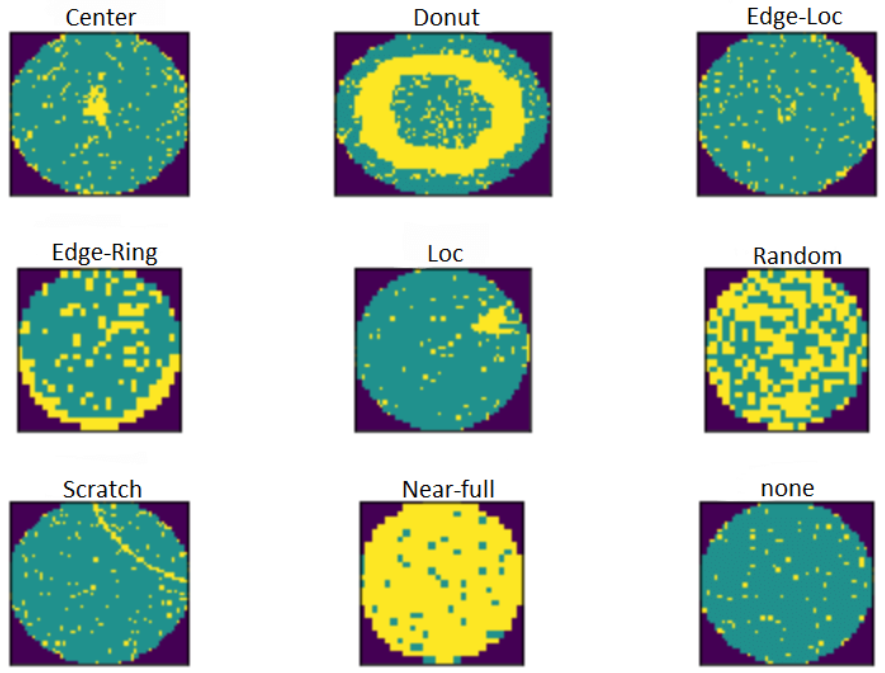

# II. EDA

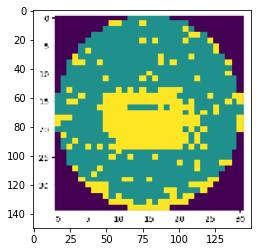

In [15]:
#이미지 하나씩 아무거나 시각화해보기(시간되면 묶어서 3 * 3배치로 출력)
from keras.preprocessing import image 
import numpy as np
import matplotlib.pyplot as plt

#img1 : Center - 가운데 불량이 몰려서 나타남
img_path1 = 'waferimages/waferimages/training/Center/106264.png'

img1 = image.load_img(img_path1, target_size = (150, 150))

img_tensor1 = image.img_to_array(img1)
img_tensor1 = np.expand_dims(img_tensor1, axis = 0)

img_tensor1 = img_tensor1 / 255.

plt.imshow(img_tensor1[0])
plt.show()

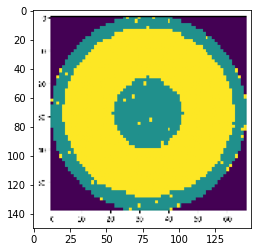

In [17]:
#img2 : Donut - 불량이 도넛모양처럼 나타남(가운데와 겉면은 정상이 많음)
img_path2 = 'waferimages/waferimages/training/Donut/116252.png'

img2 = image.load_img(img_path2, target_size = (150, 150))

img_tensor2 = image.img_to_array(img2)
img_tensor2 = np.expand_dims(img_tensor2, axis = 0)

img_tensor2 = img_tensor2 / 255.

plt.imshow(img_tensor2[0])
plt.show()

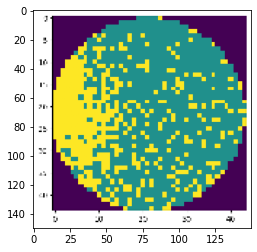

In [19]:
#img3 : Edge-Loc - 불량이 한쪽에 뭉쳐저 나타남
img_path3 = 'waferimages/waferimages/training/Edge-Loc/102572.png'

img3 = image.load_img(img_path3, target_size = (150, 150))

img_tensor3 = image.img_to_array(img3)
img_tensor3 = np.expand_dims(img_tensor3, axis = 0)

img_tensor3 = img_tensor3 / 255.

plt.imshow(img_tensor3[0])
plt.show()

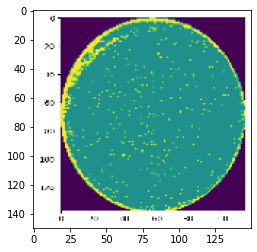

In [21]:
#img4 : Edge-Ring - 불량이 반지모양처럼 원 가장자리에 모인 형태로 나타남
img_path4 = 'waferimages/waferimages/training/Edge-Ring/100574.png'

img4 = image.load_img(img_path4, target_size = (150, 150))

img_tensor4 = image.img_to_array(img4)
img_tensor4 = np.expand_dims(img_tensor4, axis = 0)

img_tensor4 = img_tensor4 / 255.

plt.imshow(img_tensor4[0])
plt.show()

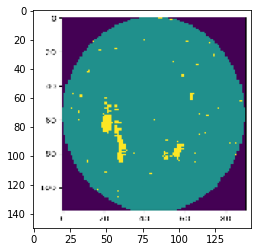

In [22]:
#img5 : Loc - 불량이 원 안의 일정구역에 모여서 나타남
img_path5 = 'waferimages/waferimages/training/Loc/100401.png'

img5 = image.load_img(img_path5, target_size = (150, 150))

img_tensor5 = image.img_to_array(img5)
img_tensor5 = np.expand_dims(img_tensor5, axis = 0)

img_tensor5 = img_tensor5 / 255.

plt.imshow(img_tensor5[0])
plt.show()

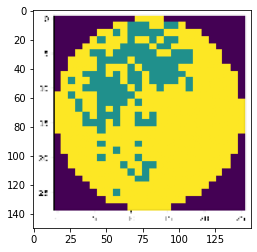

In [23]:
#img6 : Near-full - 거의 모든 구역이 불량으로 나타남(노란 부분이 다수인 경우)
img_path6 = 'waferimages/waferimages/training/Near-full/243685.png'

img6 = image.load_img(img_path6, target_size = (150, 150))

img_tensor6 = image.img_to_array(img6)
img_tensor6 = np.expand_dims(img_tensor6, axis = 0)

img_tensor6 = img_tensor6 / 255.

plt.imshow(img_tensor6[0])
plt.show()

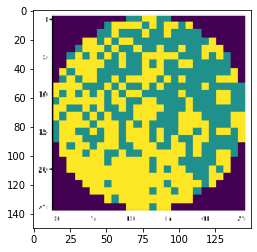

In [20]:
#img7 : Random - 불량이 산발적으로 여러곳에서 나타나는 형태(인 것 같다)
img_path7 = 'waferimages/waferimages/training/Random/112080.png'

img7 = image.load_img(img_path7, target_size = (150, 150))

img_tensor7 = image.img_to_array(img7)
img_tensor7 = np.expand_dims(img_tensor7, axis = 0)

img_tensor7 = img_tensor7 / 255.

plt.imshow(img_tensor7[0])
plt.show()

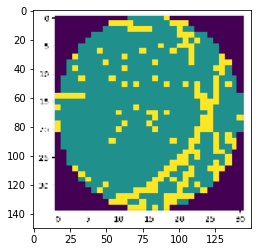

In [24]:
#img8 : Scratch - 불량이 흉터 모양처럼 긴 형태로 나타남
img_path8 = 'waferimages/waferimages/training/Scratch/107435.png'

img8 = image.load_img(img_path8, target_size = (150, 150))

img_tensor8 = image.img_to_array(img8)
img_tensor8 = np.expand_dims(img_tensor8, axis = 0)

img_tensor8 = img_tensor8 / 255.

plt.imshow(img_tensor8[0])
plt.show()

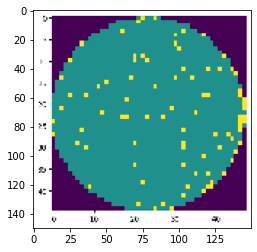

In [25]:
#img9 : none - 위 유형에 포함되지 않는 기타형태
img_path9 = 'waferimages/waferimages/training/none/1.png'

img9 = image.load_img(img_path9, target_size = (150, 150))

img_tensor9 = image.img_to_array(img9)
img_tensor9 = np.expand_dims(img_tensor9, axis = 0)

img_tensor9 = img_tensor9 / 255.

plt.imshow(img_tensor9[0])
plt.show()

# III. Data Preprocessing
* With Import ResNet50 & some layers Freezing

### 1) Image_File Directory Setting

In [30]:
train_dir = 'waferimages/waferimages/training' 
test_dir = 'waferimages/waferimages/testing'

### 2) ImageDataGenerator & flow_from_directory

In [32]:
from keras.preprocessing.image import ImageDataGenerator

#normalization
train_datagen = ImageDataGenerator(rescale = 1./255) 
test_datagen = ImageDataGenerator(rescale = 1./255)

#resizing
train_generator = train_datagen.flow_from_directory( 
    train_dir,
    target_size = (150, 150), 
    batch_size = 50, 
    class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150), 
    batch_size = 50, 
    class_mode = 'categorical')
#train 디렉토리를 split하여 validation 디렉토리로 만들 수 없을 까 고민하다가, 
#우선 test디렉토리를 validation 용으로 설정하고 모델부터 만들어보기로함
#(시간때문에)

Found 54374 images belonging to 9 classes.
Found 118595 images belonging to 9 classes.


### 3) Base Model Load
* Imagenet의 ResNet50

In [67]:
from keras.applications import ResNet50

#imagenet에 이미 훈련된 ResNet50 불러오기
base_model = ResNet50(weights = None,  #일반적인 이미지데이터와는 다른 것 같아 가중치는 우선 부여X
                      include_top = False, 
                      input_shape = (150, 150, 3))

In [68]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

### 4) Layer Freezing
* 마지막 부분인 conv5_block3 부분만 남기고 Freezing

In [69]:
#freezing 이전 훈련 가능 가중치 종류
print(len(base_model.trainable_weights))

212


In [70]:
#고정 
set_trainable = False

for layer in base_model.layers: 
  if layer.name == 'conv5_block3_1_conv': 
    set_trainable = True

  if set_trainable: 
    layer.trainable = True
  else: 
    layer.trainable = False

In [71]:
#freezing 이후 훈련 가능 가중치 종류
print(len(base_model.trainable_weights))

12


In [72]:
#freezing된 부분 확인
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

# IV. Modeling
* ResNet50 사용 - Fine Tuning 진행

### 1)Model Define

In [96]:
#튜닝레이어 연결하기
from keras import models, layers

model = models.Sequential() 
model.add(base_model)

model.add(layers.Flatten())
model.add(layers.Dense(512)) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(256)) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(9, activation = 'softmax'))


In [97]:
#레이어 확인
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 5, 5, 2048)        23587712  
_________________________________________________________________
flatten_9 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_29 (Dense)             (None, 512)               26214912  
_________________________________________________________________
batch_normalization_12 (Batc (None, 512)               2048      
_________________________________________________________________
activation_12 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 256)              

### 2)Model Compile

In [100]:
from keras import optimizers

model.compile(loss = 'categorical_crossentropy', 
              optimizer = optimizers.Adam(lr = 0.0000001), 
              metrics = ['accuracy'])

### 3)Model Fit



In [101]:
%%time
Hist_model = model.fit(train_generator, 
                       steps_per_epoch = 100, 
                       epochs = 30,
                       validation_data = test_generator, 
                       validation_steps = 50)

Epoch 1/30
100/100 [==============================] - 32s 287ms/step - loss: 2.6814 - accuracy: 0.1220 - val_loss: 2.2387 - val_accuracy: 0.1220
Epoch 2/30
100/100 [==============================] - 27s 271ms/step - loss: 2.6186 - accuracy: 0.1445 - val_loss: 2.2160 - val_accuracy: 0.1420
Epoch 3/30
100/100 [==============================] - 27s 269ms/step - loss: 2.5335 - accuracy: 0.1533 - val_loss: 2.1729 - val_accuracy: 0.1600
Epoch 4/30
100/100 [==============================] - 27s 269ms/step - loss: 2.4812 - accuracy: 0.1749 - val_loss: 2.1448 - val_accuracy: 0.1796
Epoch 5/30
100/100 [==============================] - 27s 270ms/step - loss: 2.4468 - accuracy: 0.1732 - val_loss: 2.1466 - val_accuracy: 0.1720
Epoch 6/30
100/100 [==============================] - 27s 271ms/step - loss: 2.3792 - accuracy: 0.1854 - val_loss: 2.1221 - val_accuracy: 0.1952
Epoch 7/30
100/100 [==============================] - 27s 271ms/step - loss: 2.3802 - accuracy: 0.1885 - val_loss: 2.0828 - val_ac

In [102]:
#임시기록 
#epoch 20 (11분21초)
#loss : 0.8754, accuracy : 0.7527 / val_loss : 1.3564, val_accuracy :0.6896(지속적으로 높아짐)
#epoch 50 (28분 23초)
#loss : 0.4224, accuracy :  0.9052 / val_loss : 1.0013, val_accuracy :0.7516

#최종적으로 epoch는 우선 30만 돌리고 파라미터 조금씩 수정하기로함 
#(학습률, dropout비율 등...50은 시간이 한번에 너무많이걸림)

## 5.Model Validation

### 1) Loss & Accuracy Visualization

* validation data를 test data를 넣어 수행함
* train 디렉토리에 들어있는 이미지파일을 train/validation으로 코드를통해 분리가능한지 추가로 찾아볼 것

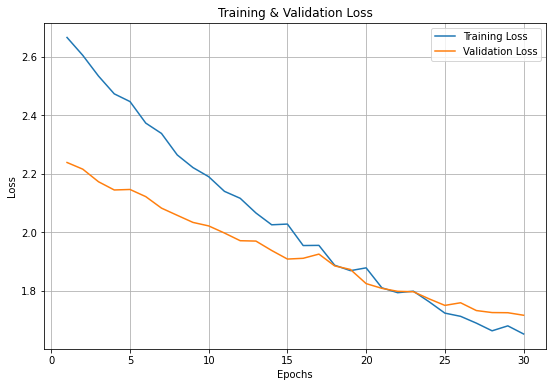

In [103]:
#Loss
epochs = range(1, len(Hist_model.history['loss']) + 1)

plt.figure(figsize = (9, 6)) 
plt.plot(epochs, Hist_model.history['loss']) 
plt.plot(epochs, Hist_model.history['val_loss'])

plt.title('Training & Validation Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend(['Training Loss', 'Validation Loss']) 
plt.grid()
plt.show()

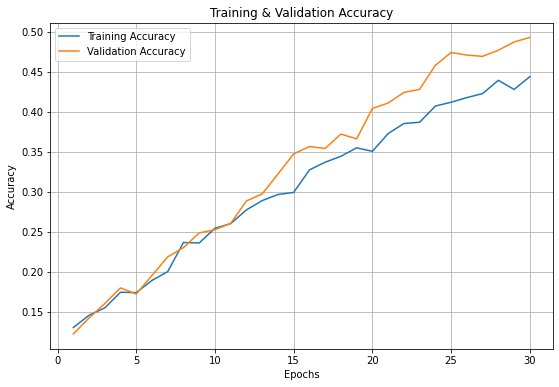

In [104]:
#Accuracy
epochs = range(1, len(Hist_model.history['loss']) + 1)

plt.figure(figsize = (9, 6)) 
plt.plot(epochs, Hist_model.history['accuracy']) 
plt.plot(epochs, Hist_model.history['val_accuracy'])

plt.title('Training & Validation Accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend(['Training Accuracy', 'Validation Accuracy']) 
plt.grid() 
plt.show()

### 2) Model Evaluate

In [105]:

loss, accuracy = model.evaluate(test_generator, steps = 50)

print('Loss = {:.5f}'.format(loss)) 
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 9s 174ms/step - loss: 1.7104 - accuracy: 0.4892
Loss = 1.71040
Accuracy = 0.48920


In [ ]:
#50번 돌렸을 때보다는 accuracy가 좋진 않지만, 높아지는 경향을 보임
#추후 더 많은 epoch/세밀한 조정/더 많은 데이터를 통해 accuracy를 더 향상시켜야함

감사합니다:)!